In [ ]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np

# Gaussian Process

#### Definition
For any set S, a Gaussian Process (GP) on S is a set of random variables (r.v.) ($Z_t: t \in S$) such that $\forall n \in \mathbb{N}, \forall t_1,..,t_n \in S, (Z_{t_1},..,Z_{t_n})$ is a (multivariate) Gaussian.

#### Example 1
##### (trivial)
$S = {1,..,d},\quad Z_t = (Z_1,..,Z_d) \in R^d$


#### Example 2
##### Random Lines
$S = \mathbb{R},\quad Z_t = tW,\quad W \sim N(0,1)$

$\begin{bmatrix}
    Z_{t_1} \\
    \vdots \\
    Z_{t_n}
\end{bmatrix} = 
\begin{bmatrix}
    t_1 \\
    \vdots \\
    t_n
\end{bmatrix}W
$
by the affine property this is a multivariate Gaussian.


### Existence of GP
Theorem: For any set S, for any mean function $\mu: S \rightarrow R$, and any cov function $k: S\times S \rightarrow R$, there exists a GP ($Z_t$) on S s.t. $E(Z_t)=\mu(t),\quad cov(Z_s,Z_t) = k(s,t)$

<IPython.core.display.Javascript object>


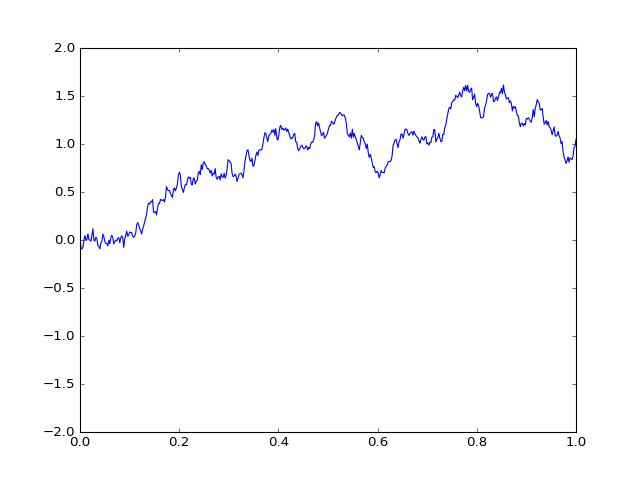

In [79]:
#1 Dimensional examples of Gaussian Processes with \mu(t) = 0
KC=1 # Kernel Choice
if KC == 0:
    k = lambda x,y: x*y # random lines 
elif KC == 1:
    k = lambda x,y: min(x,y) # brownian motion, the further a point is from the start of the motion 
                         # the more cov it has with the other points. lets say y>x, y-x=d then y ~ N(x,d*sigma)
                         # cov(x,y) = E(xy)-E(x)E(y) = E(N(0,x*sigma)*N(x,(y-x)*sigma))-0 = c*x
                         # S = [0,inf]
elif KC == 2:
    k = lambda x,y: np.exp(-100*(x-y)**2) #smoothness, close points are more correlated. alpha = 100 controls
                                      #the smoothness, the smaller the smoother
elif KC == 3:
    k = lambda x,y: np.exp(-1*np.abs(x-y)) #less smooth. Can model the velocity of a particle that is moving on 
                                        # brownian motion
elif KC == 4:
    k = lambda x,y: np.exp(-1*np.sin(5*np.pi*(x-y))**2) #periodic signal
elif KC == 5:
    k = lambda x,y: np.exp(-100*min(np.abs(x-y),np.abs(x+y))**2) #symmetric at the origin 
                                                    #(change the xlim to [-1,1]) to see it

t = np.linspace(0,1,500)
n = len(t)
#construct covariance matrix
C = np.zeros((n,n),np.float32)
for r in range(n):
    for c in range(n):
        C[r,c] = k(t[r],t[c])

z = np.random.multivariate_normal(np.zeros((n,)),C,size=1).ravel()
plt.figure()
plt.xlim([0,1])
plt.ylim([-2,2])
plt.plot(t,z)

# Covariance Functions:
***
Definition: A Covariance function, PSD (Positive Semi-Definite) kernel, is a fn $k: S \times S \rightarrow R$ s.t. $k(x_i,x_j) = C_{i,j},\quad x_i \in S,\quad \forall i$.

C is PSD iff $u^TCu \geqslant 0, \quad \forall u \in R^n$

C is PSD iff $\lambda_i \geqslant 0,\quad \forall i$

***
*Cool Things*

* If k(x,y) = f(x-y) then this is "stationary", invariant under translation, if I translate x and y by a constant then nothing changes.

* If k(x,y) = f(||x-y||) "isotropic" depends on the distance. Invariant under rigid motions. Rotation and translation.

* kernel trick $k(x,y) = <\phi(x),\phi(y)>$, just by specifying the kernel function we can get a feature space in infinite dimensions.

Operations keeping kernels:
* $\alpha k_1$ 
* $k_1+k_2$ 
* $k_1\times k_2$
* polinomial(k), polinomial has no negative coeff
* exp(k)
* $f(x)k_1(x,y)f(y)^*,\quad f:S \rightarrow R$
* $k(\phi(x),\phi(y)),\quad \phi: S' \rightarrow S$


# Gaussian Regression:
***
with the data:
$D = ((x_1,y_1),...(x_n,y_n)) \forall x_i \in R^d$ 

compute $p(y_j|x_j)$.

Similar to Bayesian Linear Regression but with the kernel trick instead of Basis Functions.

**Bayesian Lin reg:**

$p(y_i|x_i,w)=N(w^Tx_i,\sigma^2)$

$w \sim N(0,vI)$, w has a prior distribution (multivariate gaussian).

$w^Tx_i$ is a univariate gaussian.

$Z_x = x^Tw$ is a GP on the set $S=R^d$. 

$x_1,..,x_n \in R^d$ 

$\begin{bmatrix}
    Z_{x_1} \\
    \vdots \\
    Z_{x_n} 
\end{bmatrix}= Aw$ which is a multivariate gaussian by the affine property. This is the random lines (planes) we saw before.

Let's see if we get the same kernel and mean functions:
$E(Z_x)=E(x^Tw)=0$
$cov(Z_x,Z_{x'})=E(x^Twx'^Tw)-E(x^Tw)E(x'^Tw) = x^TE(ww^T)x' = x^Tcov(w)x' = vx^Tx'$ 

Find the parameters of the kernel function, k(s,t), and the mean function, $\mu(t)$.

$y_i = w^T\phi(x) + \epsilon$ Bayesian Linear Regression

$y_i = Z_x + \epsilon$ GP, advantage is that using the kernel trick the feature space can be infinite without having to compute the transformation (which would be impossible).

***
**The Key Step**

Let $Z \sim N(\mu,K) \in R^n,\quad \epsilon \sim N(0,\sigma^2 I)$

$Y=Z+\epsilon \sim N(\mu,K+\sigma^2 I)$

Let's say $Y_a$ is the upper half part of Y and $Y_b$ is the lower part.

$(Y_a|Y_b=y_b)=N(m,D),\quad m=\mu_a + C_{ab}C_{bb}^{-1}(y_b-\mu_b),\quad D = C_{aa}-C_{ab}C_{bb}^{-1}C_{ba}$

The posterior is a multivariate normal.
***

**Regression**

observed data:
$x_1,..,x_l \in S$

$y_1,..,y_l \in R$

$(Z_x)=GP(\mu,k)$

$Y_i = Z_x + \epsilon$

$\epsilon \sim N(0,\sigma^2 I)$

*Inference*
$(y_a|y_b)\sim N(m,D)$

$Y = \tilde{Z} + \epsilon \sim N(\tilde{\mu},\tilde{K}+\sigma^2 I)$


You have to choose k and $\mu$ .

In [33]:
z.shape

(1, 500)